<a href="https://colab.research.google.com/github/evelynmmartinez/Data-Science-Project/blob/main/StudentsSuccessPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Students' Dropout and Academic Success

## Imports

In [289]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Source of data:
1. UC Irvine Machine Learning Repository
  Cite:  
  Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

2. The data shows students in higher edcuation and the predition if they will succeed in their academics

3. Target is target whether they will dropout, enrolled, graduate.

4. A row represents a student.

5. This is a classification problem.

6. 37 features

7. 4424 rows

8. The issue I see here might be the amount of columns, a determination of what is needed and isn't might be an issue.

In [290]:
#Load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTSBvadXUJKErjo0-QaBc_YhkX122VMi6Zjzj_N02iHCO6rsGAaeGNzAqAeCHLRT1poTxuhhY_E3lKw/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Data  Exploration and Cleaning

In [292]:
df.isna().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

-No missing value

In [293]:
#Renaming the column from "Nacionality" to "Nationalty"
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [294]:
#Removing the "\t" from Daytime/evening attendance column name

df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

In [295]:
#Change column from numeric to categorical
df['Course'] = df['Course'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Marital status'] = df['Marital status'].astype('category')
df['Daytime/evening attendance'] = df['Daytime/evening attendance'].astype('category')
df['Nationality'] = df['Nationality'].astype('category')
df['Displaced'] = df['Gender'].astype('category')
df['Educational special needs'] = df['Educational special needs'].astype('category')
df['Debtor'] = df['Debtor'].astype('category')
df['Tuition fees up to date'] = df['Tuition fees up to date'].astype('category')
df['Scholarship holder'] = df['Scholarship holder'].astype('category')
df['International'] = df['International'].astype('category')



In [296]:
df.select_dtypes('object').nunique()


Target    3
dtype: int64

In [297]:
df.select_dtypes('number').nunique()


Application mode                                   18
Application order                                   8
Previous qualification                             17
Previous qualification (grade)                    101
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Age at enrollment                                  46
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                23
Curricular units 1st sem (evaluations)             35
Curricular units 1st sem (approved)                23
Curricular units 1st sem (grade)                  797
Curricular units 1st sem (without evaluations)     11
Curricular units 2nd sem (credited)                19
Curricular units 2nd sem (enrolled)                22
Curricular units 2nd sem (ev

In [298]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Target'], dtype='object')

In [299]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Application mode', 'Application order', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [300]:
#Checking for inconsistencies
for col in cat_cols:
  print(f"Value Counts for: {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for: Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64




In [301]:
for num in num_cols:
  print(f"Statistical measures: {num}")
  print(df[num].describe())
  print('\n')

Statistical measures: Application mode
count    4424.000000
mean       18.669078
std        17.484682
min         1.000000
25%         1.000000
50%        17.000000
75%        39.000000
max        57.000000
Name: Application mode, dtype: float64


Statistical measures: Application order
count    4424.000000
mean        1.727848
std         1.313793
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Application order, dtype: float64


Statistical measures: Previous qualification
count    4424.000000
mean        4.577758
std        10.216592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        43.000000
Name: Previous qualification, dtype: float64


Statistical measures: Previous qualification (grade)
count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: Previous qualif

# EDA

#### **Custom Functions**

##### **Univariate Functions**

###### **Explore Univariate Categorical Function**

- These functions were sourced from the learning platform: CodingDojo.

In [302]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x}", fontweight='bold')

  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### **Explore Univariate Numerical Function**

In [303]:
def explore_numeric(df, x, figsize=(6,5) ):


  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  sns.histplot(data=df, x=x, ax=axes[0])

  sns.boxplot(data=df, x=x, ax=axes[1])

  axes[0].set_title(f"{x}", fontweight='bold')

  fig.tight_layout()

  plt.show()


  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## Target Univariate Visualization

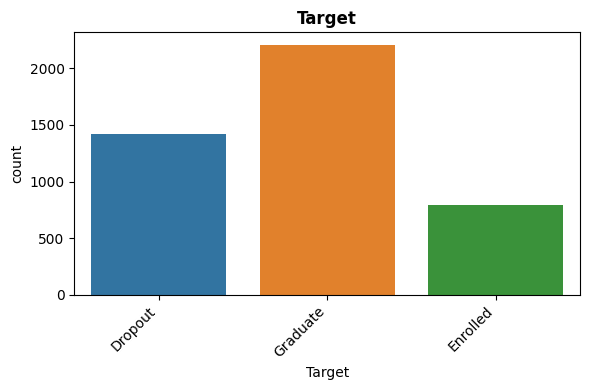

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Graduate' occurs 2209 times (49.93%)
- Not constant or quasi-constant.


In [304]:
feature = 'Target'
explore_categorical(df, feature);

- It is observed that the count for 'Graduate' is the highest, occuring 2,209 times almost 50% of the counts are 'Graduates.' This is a positive count as the the study is to see how many students will either, dropout, enroll or graduate, being the successful outcome.

# Feature inspections:

Univariate Visualizations

### Marital status

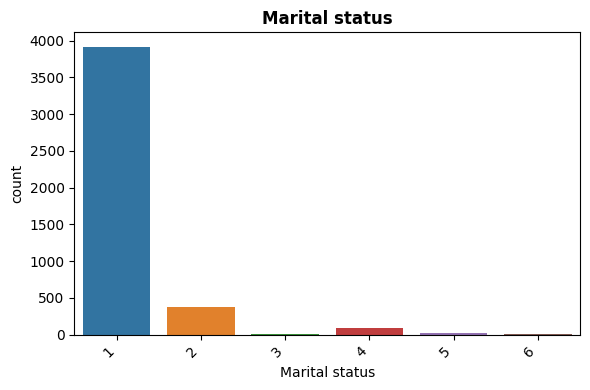

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '1' occurs 3919 times (88.58%)
- Not constant or quasi-constant.


In [305]:
feature = 'Marital status'
explore_categorical(df, feature);

- Most students are single, 88.58% of the values were for single students. 6- legally seperated was the lowest. The second highest count is the (2) – married.


### Application mode

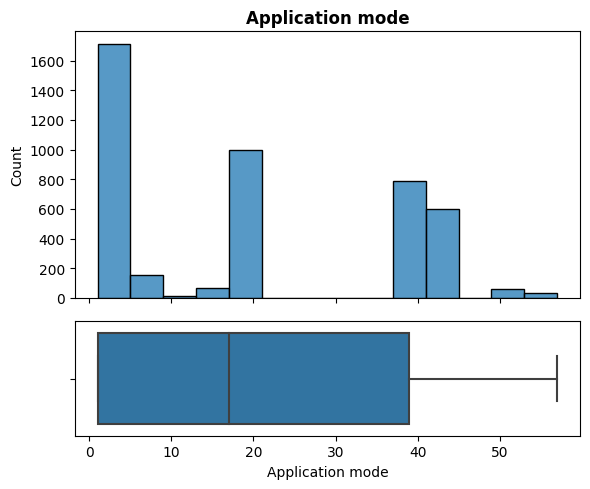

- NaN's Found: 0 (0.0%)
- Unique Values: 18
- Most common value: '1' occurs 1708 times (38.61%)
- Not constant or quasi-constant.


In [306]:
feature = 'Application mode'
explore_numeric(df, feature);

- The highest count of the application mode is 1st phase - general contingent.

### Application order

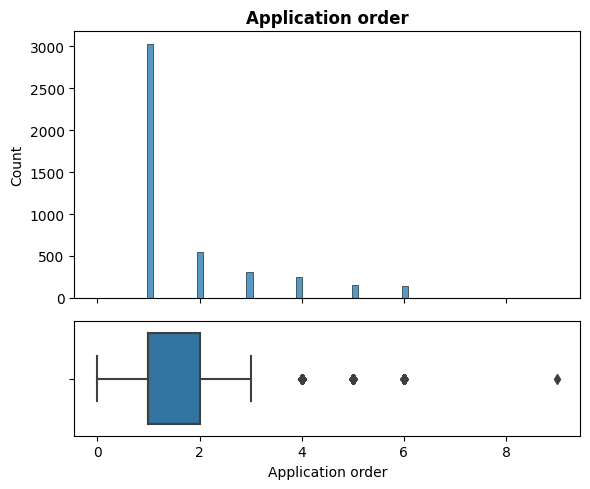

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '1' occurs 3026 times (68.4%)
- Not constant or quasi-constant.


In [307]:
feature = 'Application order'
explore_numeric(df, feature);

- The value with the highest count was on the application order was the first choice with almost 67%. Outliers here would be the 9th order of application order.

### Course

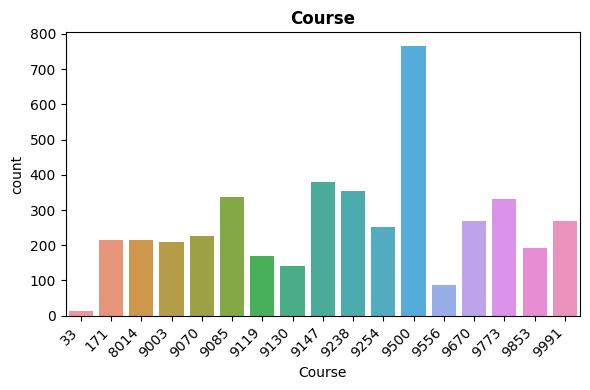

- NaN's Found: 0 (0.0%)
- Unique Values: 17
- Most common value: '9500' occurs 766 times (17.31%)
- Not constant or quasi-constant.


In [308]:
feature = 'Course'
explore_categorical(df, feature);

- The highest count for Course is 9500 - Nursing

### Daytime/Evening Attendance

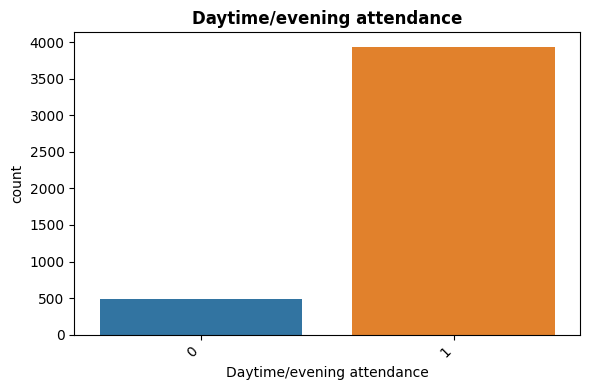

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1' occurs 3941 times (89.08%)
- Not constant or quasi-constant.


In [309]:
feature = 'Daytime/evening attendance'
explore_categorical(df, feature);

- Most students attend during daytime.

### Previous Qualification

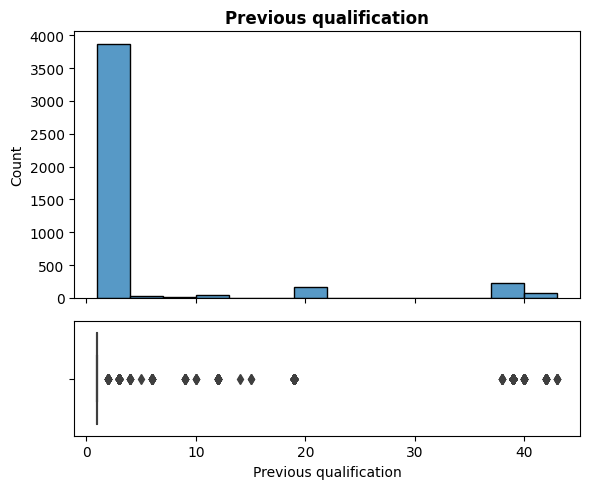

- NaN's Found: 0 (0.0%)
- Unique Values: 17
- Most common value: '1' occurs 3717 times (84.02%)
- Not constant or quasi-constant.


In [310]:
feature = 'Previous qualification'
explore_numeric(df, feature);

### Previous Qualification (Grade)

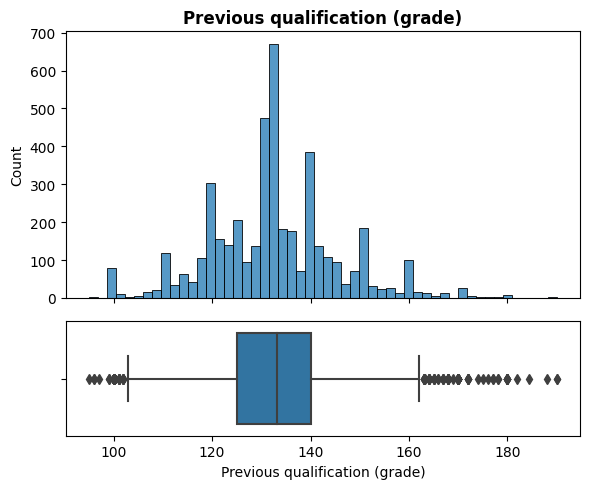

- NaN's Found: 0 (0.0%)
- Unique Values: 101
- Most common value: '133.1' occurs 491 times (11.1%)
- Not constant or quasi-constant.


In [311]:
feature = 'Previous qualification (grade)'
explore_numeric(df, feature);

### Nationality

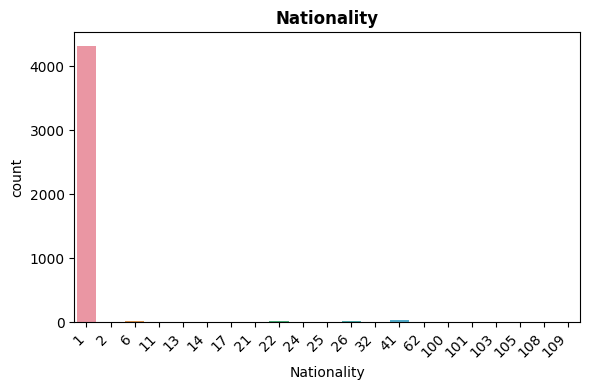

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '1' occurs 4314 times (97.51%)
- Not constant or quasi-constant.


In [312]:
feature = 'Nationality'
explore_categorical(df, feature);

- Most students are Portugese, since this data was conducted in Portugal.

### Mother's Qualification

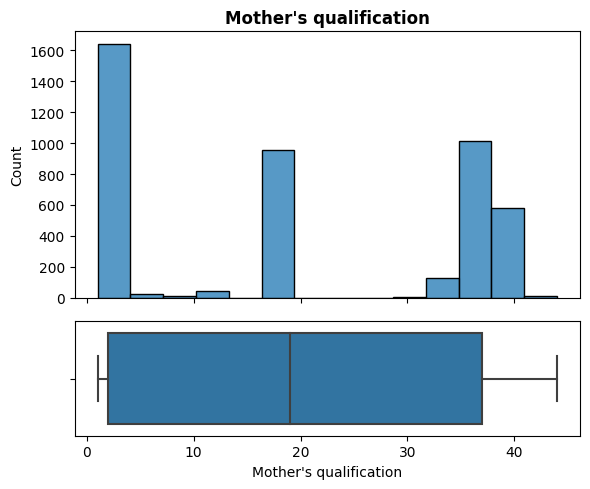

- NaN's Found: 0 (0.0%)
- Unique Values: 29
- Most common value: '1' occurs 1069 times (24.16%)
- Not constant or quasi-constant.


In [313]:
feature = "Mother's qualification"
explore_numeric(df, feature);

### Father's Qualification

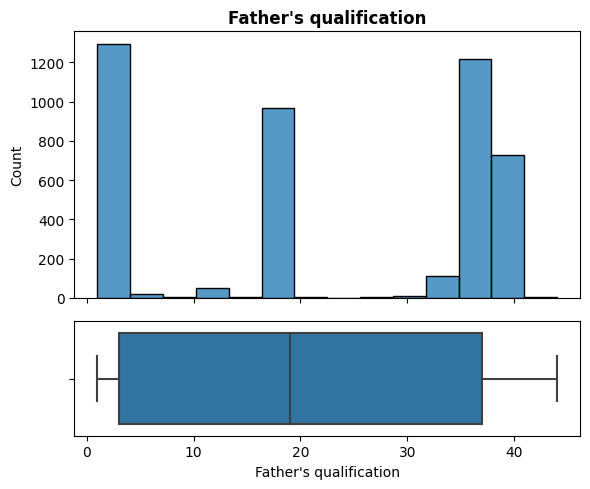

- NaN's Found: 0 (0.0%)
- Unique Values: 34
- Most common value: '37' occurs 1209 times (27.33%)
- Not constant or quasi-constant.


In [314]:
feature = "Father's qualification"
explore_numeric(df, feature);

### Mother's Occupation

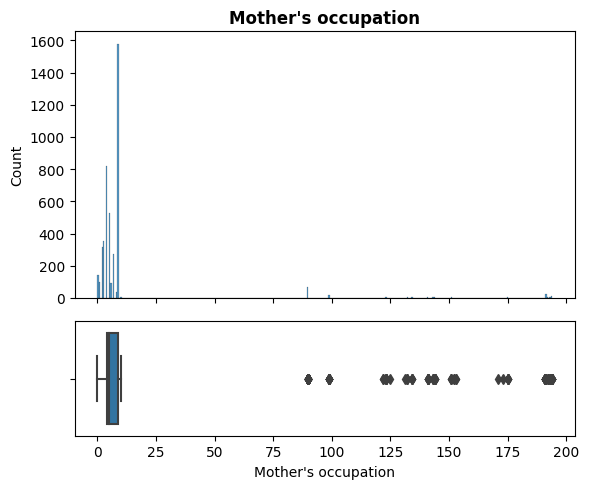

- NaN's Found: 0 (0.0%)
- Unique Values: 32
- Most common value: '9' occurs 1577 times (35.65%)
- Not constant or quasi-constant.


In [315]:
feature = "Mother's occupation"
explore_numeric(df, feature);

### Father's Occupation

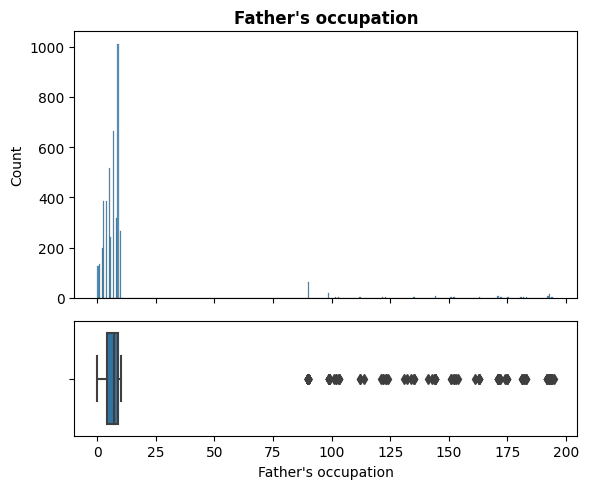

- NaN's Found: 0 (0.0%)
- Unique Values: 46
- Most common value: '9' occurs 1010 times (22.83%)
- Not constant or quasi-constant.


In [316]:
feature = "Father's occupation"
explore_numeric(df, feature);

### Admission Grade

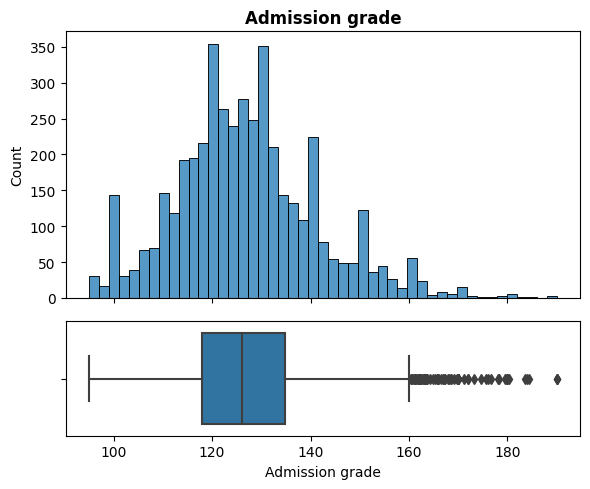

- NaN's Found: 0 (0.0%)
- Unique Values: 620
- Most common value: '130.0' occurs 162 times (3.66%)
- Not constant or quasi-constant.


In [317]:
feature = 'Admission grade'
explore_numeric(df, feature);

- One outlier higher than 180 in admission grade.

### Displaced

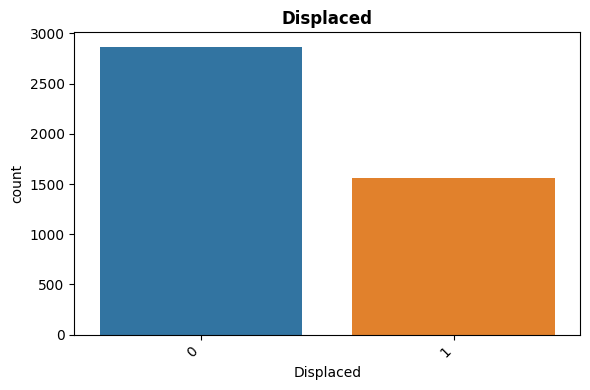

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 2868 times (64.83%)
- Not constant or quasi-constant.


In [318]:
feature = 'Displaced'
explore_categorical(df, feature);

- Most students were not displaced.

### Educational Special Needs

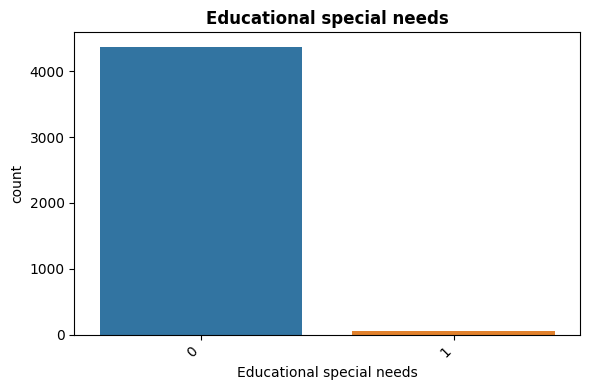

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4373 times (98.85%)

- [!] Warning: 'Educational special needs' is a constant or quasi-constant feature and should be dropped.


In [319]:
feature = 'Educational special needs'
explore_categorical(df, feature);

### Debtor

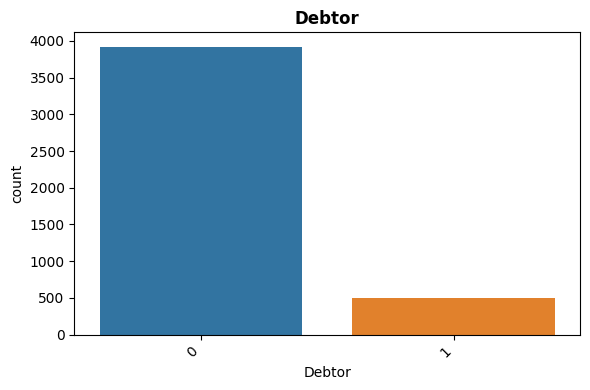

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 3921 times (88.63%)
- Not constant or quasi-constant.


In [320]:
feature = 'Debtor'
explore_categorical(df, feature);

- 88.63% of students are not in debt.

### Tuition Fees up to Date

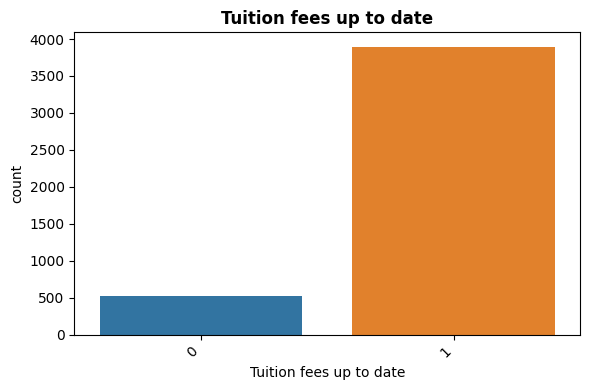

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1' occurs 3896 times (88.07%)
- Not constant or quasi-constant.


In [321]:
feature = 'Tuition fees up to date'
explore_categorical(df, feature);

- Most students are up to date with their tuition fees.

### Gender

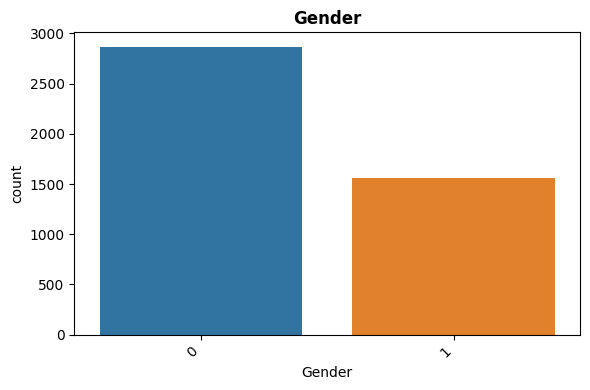

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 2868 times (64.83%)
- Not constant or quasi-constant.


In [322]:
feature = 'Gender'
explore_categorical(df, feature);

- Most students are female.

### Scholarship Holder

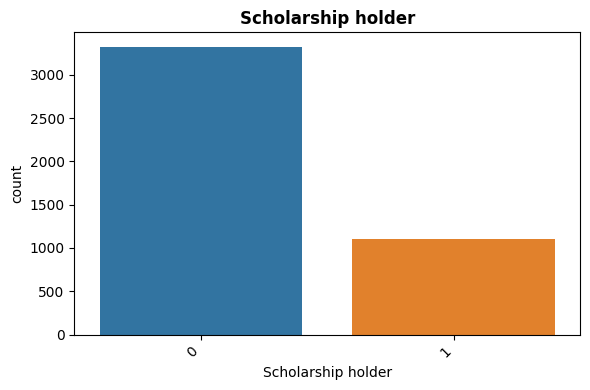

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 3325 times (75.16%)
- Not constant or quasi-constant.


In [323]:
feature = 'Scholarship holder'
explore_categorical(df, feature);

- Most students are not scholarship holders.

### Age at Enrollment

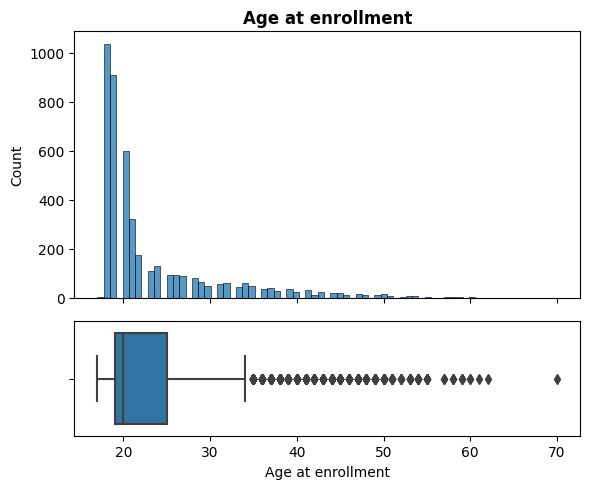

- NaN's Found: 0 (0.0%)
- Unique Values: 46
- Most common value: '18' occurs 1036 times (23.42%)
- Not constant or quasi-constant.


In [324]:
feature = 'Age at enrollment'
explore_numeric(df, feature);

- One outlier a student's age at the age of enrollment is 70.

### International

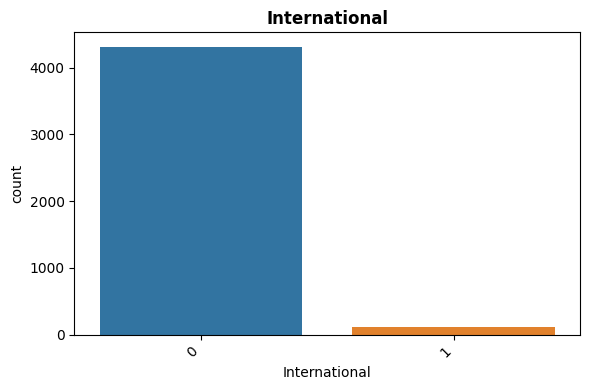

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4314 times (97.51%)
- Not constant or quasi-constant.


In [325]:
feature = 'International'
explore_categorical(df, feature);

- Most students are not international

### Curricular units 1st sem (credited)

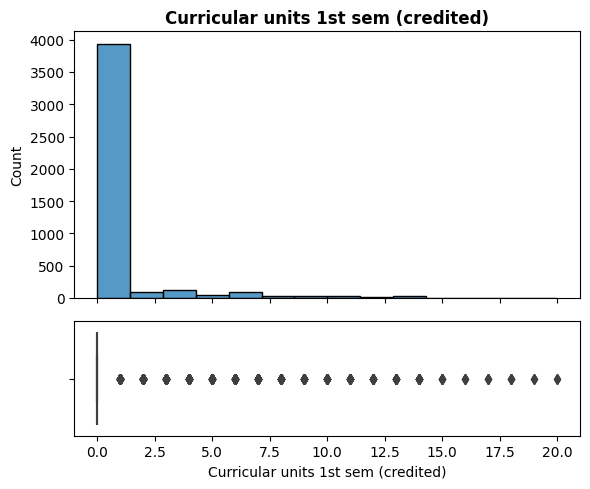

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '0' occurs 3847 times (86.96%)
- Not constant or quasi-constant.


In [326]:
feature = 'Curricular units 1st sem (credited)'
explore_numeric(df, feature);

### Curricular units 1st sem (enrolled)

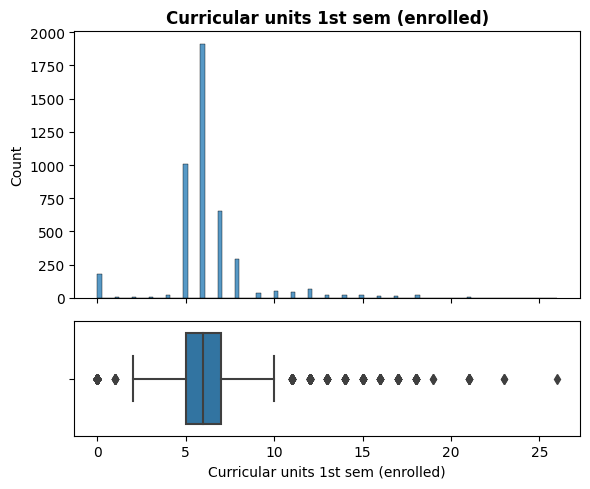

- NaN's Found: 0 (0.0%)
- Unique Values: 23
- Most common value: '6' occurs 1910 times (43.17%)
- Not constant or quasi-constant.


In [327]:
feature = 'Curricular units 1st sem (enrolled)'
explore_numeric(df, feature);


### Curricular units 1st sem (evaluations)

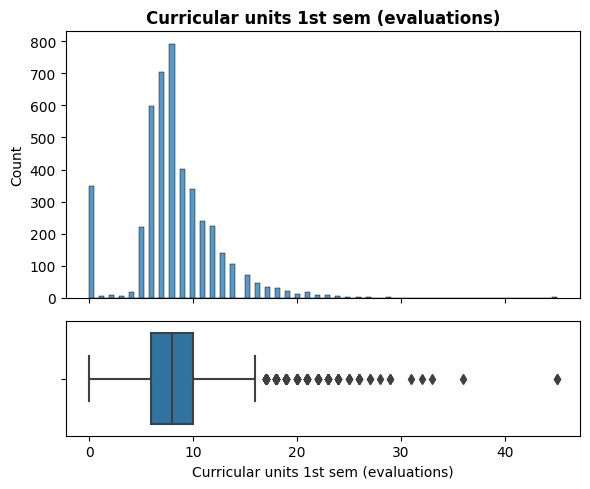

- NaN's Found: 0 (0.0%)
- Unique Values: 35
- Most common value: '8' occurs 791 times (17.88%)
- Not constant or quasi-constant.


In [328]:
feature = 'Curricular units 1st sem (evaluations)'
explore_numeric(df, feature);

### Curricular units 1st sem (approved)

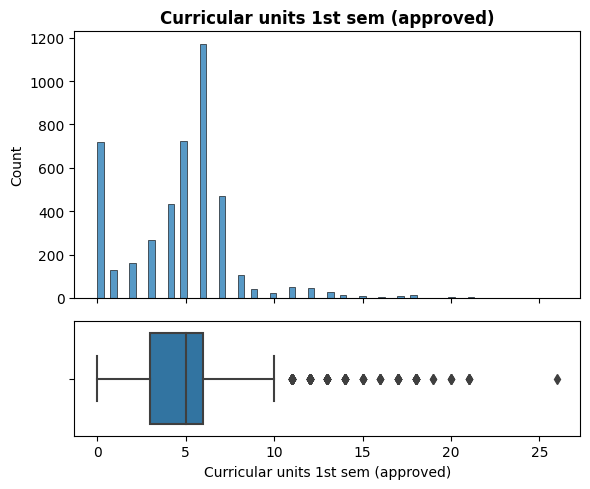

- NaN's Found: 0 (0.0%)
- Unique Values: 23
- Most common value: '6' occurs 1171 times (26.47%)
- Not constant or quasi-constant.


In [329]:
feature = 'Curricular units 1st sem (approved)'
explore_numeric(df, feature);

### Curricular units 1st sem (grade)

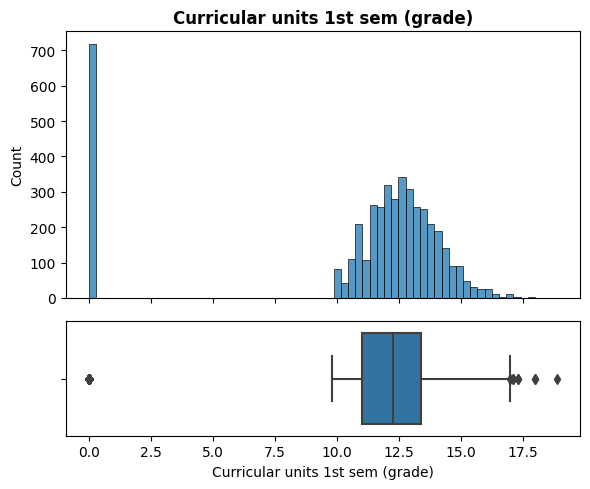

- NaN's Found: 0 (0.0%)
- Unique Values: 797
- Most common value: '0.0' occurs 718 times (16.23%)
- Not constant or quasi-constant.


In [330]:
feature = 'Curricular units 1st sem (grade)'
explore_numeric(df, feature);

### Curricular units 1st sem (without evaluations)

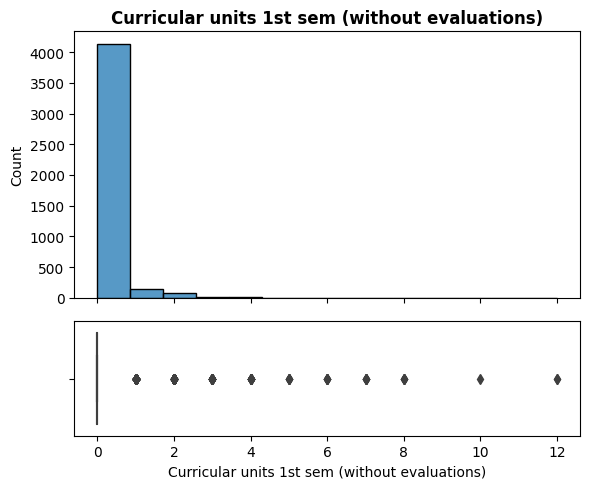

- NaN's Found: 0 (0.0%)
- Unique Values: 11
- Most common value: '0' occurs 4130 times (93.35%)
- Not constant or quasi-constant.


In [331]:
feature = 'Curricular units 1st sem (without evaluations)'
explore_numeric(df, feature);

### Curricular units 2nd sem (credited)

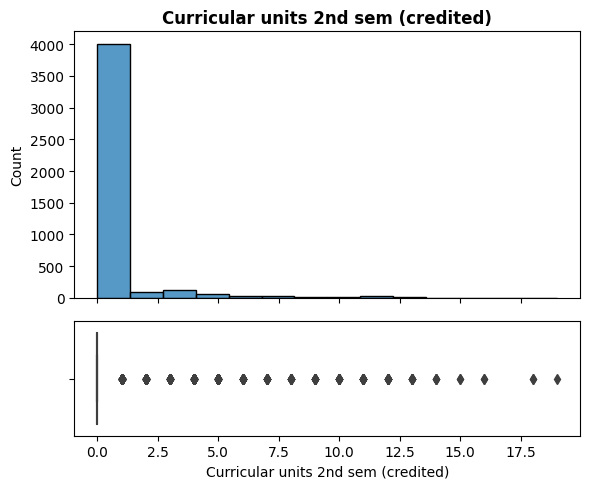

- NaN's Found: 0 (0.0%)
- Unique Values: 19
- Most common value: '0' occurs 3894 times (88.02%)
- Not constant or quasi-constant.


In [332]:
feature = 'Curricular units 2nd sem (credited)'
explore_numeric(df, feature);

### Curricular units 2nd sem (enrolled)

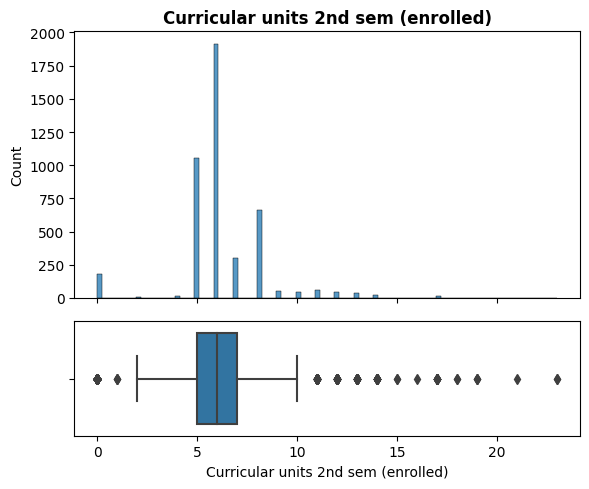

- NaN's Found: 0 (0.0%)
- Unique Values: 22
- Most common value: '6' occurs 1913 times (43.24%)
- Not constant or quasi-constant.


In [333]:
feature = 'Curricular units 2nd sem (enrolled)'
explore_numeric(df, feature);

- Outlier at 0 and above 10.

### Curricular units 2nd sem (evaluations)

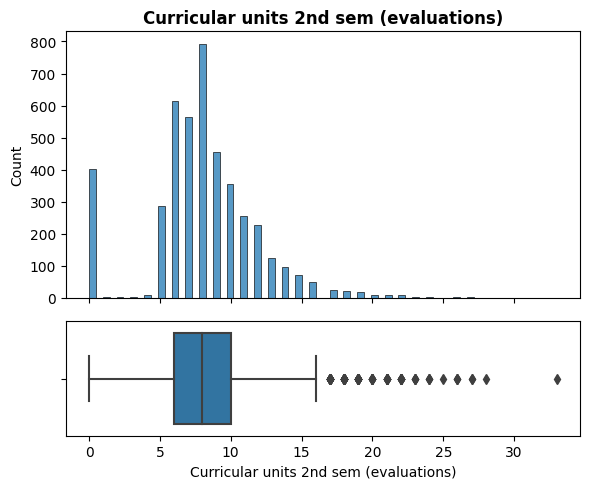

- NaN's Found: 0 (0.0%)
- Unique Values: 30
- Most common value: '8' occurs 792 times (17.9%)
- Not constant or quasi-constant.


In [334]:
feature = 'Curricular units 2nd sem (evaluations)'
explore_numeric(df, feature);

- outlier above 30.

### Curricular units 2nd sem (approved)

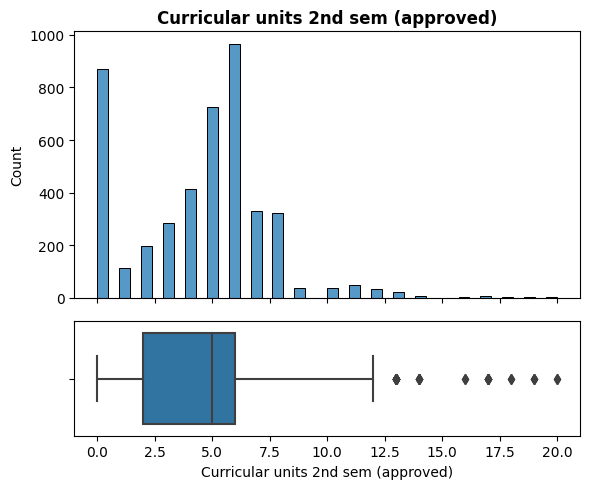

- NaN's Found: 0 (0.0%)
- Unique Values: 20
- Most common value: '6' occurs 965 times (21.81%)
- Not constant or quasi-constant.


In [335]:
feature = 'Curricular units 2nd sem (approved)'
explore_numeric(df, feature);

- outliers are above 12.5

### Curricular units 2nd sem (grade)

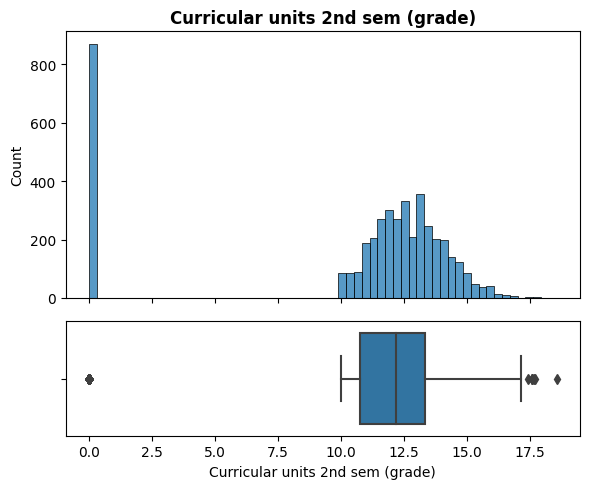

- NaN's Found: 0 (0.0%)
- Unique Values: 782
- Most common value: '0.0' occurs 870 times (19.67%)
- Not constant or quasi-constant.


In [336]:
feature = 'Curricular units 2nd sem (grade)'
explore_numeric(df, feature);

- 0.0 and over 17.5 are the outliers.

### Curricular units 2nd sem (without evaluations)

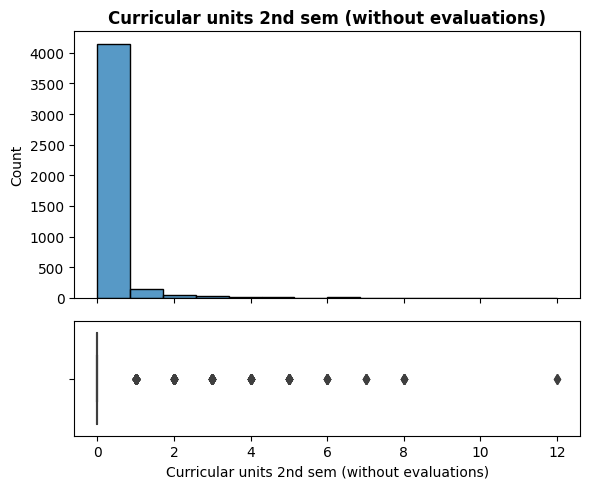

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '0' occurs 4142 times (93.63%)
- Not constant or quasi-constant.


In [337]:
feature = 'Curricular units 2nd sem (without evaluations)'
explore_numeric(df, feature);

- 12 units in evaluations is the outlier in this feature.

### Unemployment rate

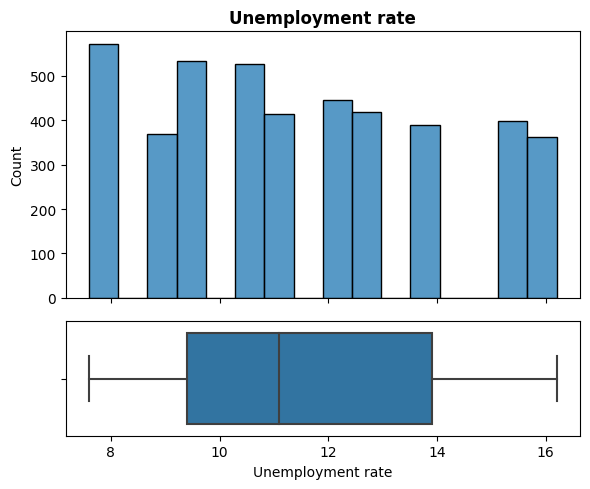

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '7.6' occurs 571 times (12.91%)
- Not constant or quasi-constant.


In [338]:
feature = 'Unemployment rate'
explore_numeric(df, feature);

- No outliers

### Inflation rate

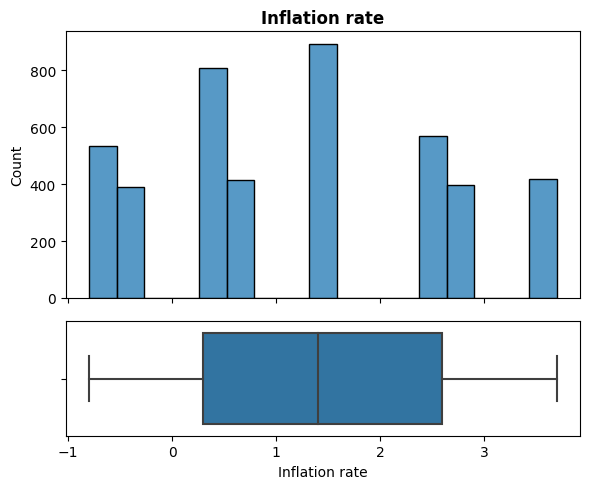

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1.4' occurs 893 times (20.19%)
- Not constant or quasi-constant.


In [339]:
feature = 'Inflation rate'
explore_numeric(df, feature);

- No outliers

### GDP


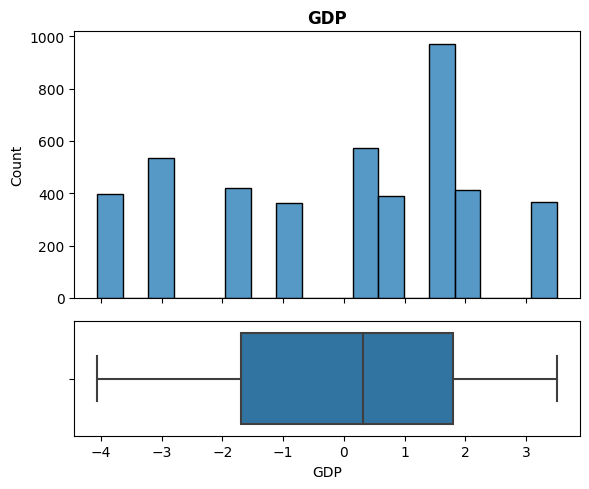

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '0.32' occurs 571 times (12.91%)
- Not constant or quasi-constant.


In [340]:
feature = 'GDP'
explore_numeric(df, feature);

- No outliers